# Q1

In [37]:
import numpy as np
import scipy
from scipy import linalg as la
import sympy as sy
from matplotlib import pyplot as plt
from scipy import sparse

### Solving linear systems of equations

In [2]:
def diag_dom(n, num_entries=None):
    """Generate a strictly diagonally dominant (n, n) matrix.
    Parameters:
    n (int): The dimension of the system.
    num_entries (int): The number of nonzero values.
    Defaults to n^(3/2)-n.
    Returns:
    A ((n,n) ndarray): A (n, n) strictly diagonally dominant matrix.
    """
    if num_entries is None:
        num_entries = int(n**1.5) - n
        A = np.zeros((n,n))
        rows = np.random.choice(np.arange(0,n), size=num_entries)
        cols = np.random.choice(np.arange(0,n), size=num_entries)
        data = np.random.randint(-4, 4, size=num_entries)
        for i in range(num_entries):
            A[rows[i], cols[i]] = data[i]
        for i in range(n):
            A[i,i] = np.sum(np.abs(A[i])) + 1
    return A

In [3]:
def jacobi(A,b,maxiter, tol):
    U=np.triu(A,1)
    L=np.tril(A,1)
    D= np.diag(np.diag(A))    
    xold=np.ones(len(b))*0.0001
    #xold=la.solve_triangular(D,(-(L+U)*xold+b))
    for j in range(maxiter):
        #xnew=la.solve_triangular(D,(-(L+U)*xold+b))
        xnew=xold+la.inv(D)@(b-A@xold)
        diff=la.norm(xnew-xold)
        if diff<=tol:
            print("converged!")
            print(j)
            break
        else:
            xold=xnew
    return xnew,diff

In [4]:
maxiter=100000
tol=0.000001
A=diag_dom(5)
b=np.random.random(5)
xout,diffout=jacobi(A,b,maxiter, tol)

converged!
19


# Q2

In [5]:
def jacobi(A,b,maxiter, tol, plot = False):
    U=np.triu(A,1)
    L=np.tril(A,1)
    D= np.diag(np.diag(A))    
    xold=np.zeros(len(b))
    diffplot=[]
    for j in range(maxiter):
        xnew=xold+la.inv(D)@(b-A@xold)
        diff=la.norm(xnew-xold)
        diffplot.append(diff)
        if diff<=tol:
            print(j)
            print("converged!")
            x=np.arange(j+1)
            print(x)
            if plot==True:
                diffplot = np.array(diffplot)
                plt.semilogy(x, diffplot)
                plt.show()           
            break
        else:
            xold=xnew
    return xnew,diff

23
converged!
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]


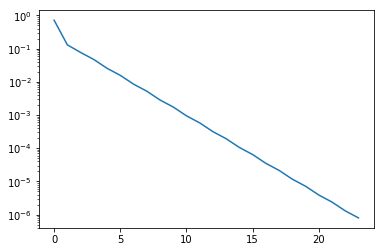

In [6]:
maxiter=100000
tol=0.000001
A=diag_dom(5)
b=np.random.random(5)
xout,diffout=jacobi(A,b,maxiter, tol,plot = True)

# Q3

In [25]:
def GS(A,b,maxiter,tol):
    xnew=np.empty([len(A)])
    xold=np.zeros([len(A)])
    for j in range(maxiter):
        for i in range(len(A)):
            xnew[i]=xold[i]+(1/A[i,i])*(b[i]-A[i,:].T@xold)
            diff=la.norm(xnew-xold)
        if diff<=tol:
            print("converged!")
            break
        else:
            xold=np.copy(xnew)
    return xnew,diff,j

In [27]:
maxiter=100000
tol=0.000001
A=diag_dom(8)
b=np.random.random(8)
xout,diffout,itnum=GS(A,b,maxiter, tol)
print(xout,diffout,itnum)

converged!
[0.58202528 0.20925581 0.32814558 0.10247503 0.19038319 0.21829709
 0.19905307 0.34030425] 9.865299126079847e-07 28


# Q4

In [53]:
def sparseGS(A,b,maxiter,tol):
    r,c=A.shape
    xnew=np.empty([c])
    xold=np.zeros([c])
    for j in range(maxiter):
        for i in range(c):
            rowstart = A.indptr[i]
            rowend = A.indptr[i+1]
            Aix = A.data[rowstart:rowend] @ xold[A.indices[rowstart:rowend]]
            xnew[i]=xold[i]+(1/A[i,i])*(b[i]-Aix)
                       
            diff=la.norm(xnew-xold)
        if diff<=tol:
            print("converged!")
            break
        else:
            xold=np.copy(xnew)
    return xnew,diff,j

In [45]:
A = sparse.csr_matrix(diag_dom(5000))
b = np.random.random(5000)
maxiter=100
tol=0.000001

In [54]:
xout,diffout,itnum=sparseGS(A,b,maxiter, tol)
print(diffout)
print(itnum)

converged!
2.5924239065615076e-07
10


# Q 5

In [48]:
def relaxsparseGS(A,b,omega,maxiter,tol):
    r,c=A.shape
    xnew=np.empty([c])
    xold=np.zeros([c])
    for j in range(maxiter):
        for i in range(c):
            rowstart = A.indptr[i]
            rowend = A.indptr[i+1]
            Aix = A.data[rowstart:rowend] @ xold[A.indices[rowstart:rowend]]
            xnew[i]=xold[i]+(omega/A[i,i])*(b[i]-Aix)
                       
            diff=la.norm(xnew-xold)
        if diff<=tol:
            print("converged!")
            break
        else:
            xold=np.copy(xnew)
    return xnew,diff,j

In [51]:
A = sparse.csr_matrix(diag_dom(5000))
b = np.random.random(5000)
maxiter=100
tol=0.000001
omega=0.6
xout,diffout,itnum=relaxsparseGS(A,b,omega,maxiter, tol)
print(itnum)

converged!
21


# Q6